In [1]:
import tensorflow as tf
import os

In [2]:
pip list


Package                      Version
---------------------------- --------
absl-py                      1.4.0
asttokens                    2.2.1
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.1
certifi                      2023.5.7
charset-normalizer           3.2.0
colorama                     0.4.6
comm                         0.1.3
contourpy                    1.1.0
cycler                       0.11.0
debugpy                      1.6.7
decorator                    5.1.1
executing                    1.2.0
flatbuffers                  23.5.26
fonttools                    4.40.0
gast                         0.4.0
google-auth                  2.21.0
google-auth-oauthlib         1.0.0
google-pasta                 0.2.0
grpcio                       1.56.0
h5py                         3.9.0
idna                         3.4
ipykernel                    6.24.0
ipython                      8.14.0
jedi                         0.18.2
jupyt


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\deepi\ImageClassification\imageclassification\Scripts\python.exe -m pip install --upgrade pip


In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\deepi\ImageClassification\imageclassification\Scripts\python.exe -m pip install --upgrade pip


In [4]:
import cv2
import imghdr

In [5]:
data_file = 'ImageClassification/data'
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\deepi\ImageClassification\imageclassification\Scripts\python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

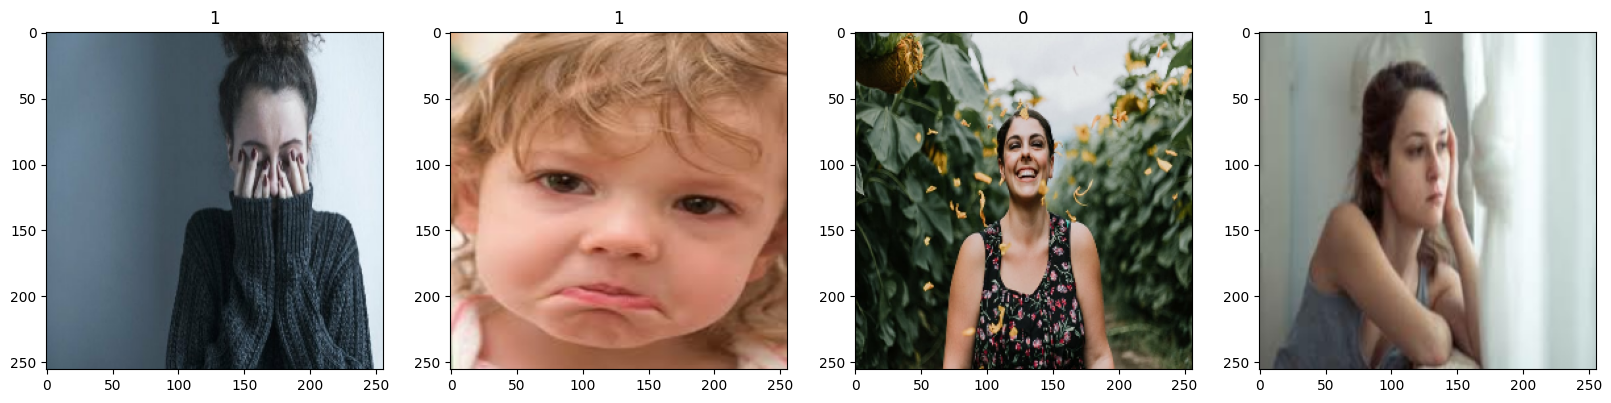

In [11]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

data scaling

In [12]:
data = data.map(lambda x,y: (x/255, y))

In [13]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[0.06666667, 0.07058824, 0.14117648],
          [0.06666

In [14]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)
train_size

7

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

DEEP LEARNING MODEL

In [16]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential()

In [18]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

Traing the model

In [20]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 15s 1s/step - loss: 1.0570 - accuracy: 0.5089 - val_loss: 0.6917 - val_accuracy: 0.5625
Epoch 2/20
7/7 [==============================] - 12s 1s/step - loss: 0.6404 - accuracy: 0.5714 - val_loss: 0.5749 - val_accuracy: 0.6250
Epoch 3/20
7/7 [==============================] - 11s 1s/step - loss: 0.5813 - accuracy: 0.7054 - val_loss: 0.5889 - val_accuracy: 0.8125
Epoch 4/20
7/7 [==============================] - 12s 1s/step - loss: 0.5052 - accuracy: 0.8080 - val_loss: 0.3559 - val_accuracy: 0.8750
Epoch 5/20
7/7 [==============================] - 12s 1s/step - loss: 0.4470 - accuracy: 0.8482 - val_loss: 0.4492 - val_accuracy: 0.7500
Epoch 6/20
7/7 [==============================] - 12s 1s/step - loss: 0.3617 - accuracy: 0.8571 - val_loss: 0.1957 - val_accuracy: 0.9219
Epoch 7/20
7/7 [==============================] - 12s 1s/step - loss: 0.2295 - accuracy: 0.8884 - val_loss: 0.1438 - val_accuracy: 0.9688
Epoch 8/20
7/7 [==================

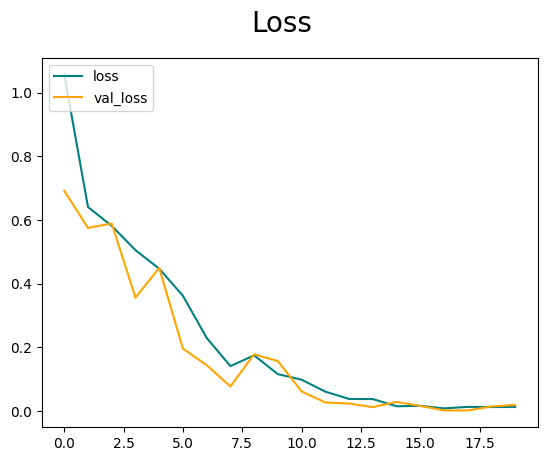

In [21]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

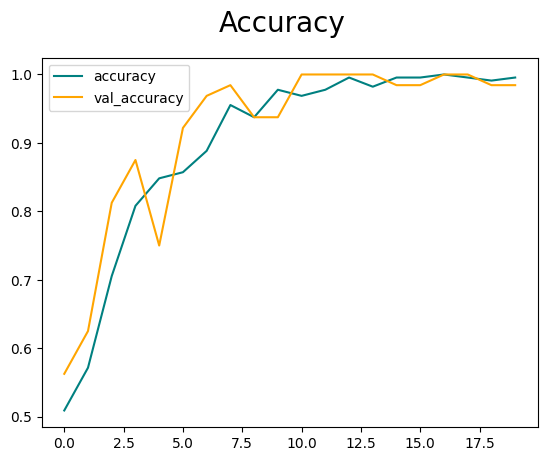

In [22]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [23]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 359ms/step


In [24]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [25]:
import cv2
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('ImageClassification/IMG_20221003_142502.jpg')

# Check if the image is successfully loaded
if img is not None:
    # Convert BGR image to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
else:
    print("Failed to read the image.")

Failed to read the image.


SyntaxError: invalid syntax (3827820173.py, line 1)